In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
caudal=pd.read_excel('dt_caudal.xlsx')

In [8]:
def sum_riemann(xi,xf,f,n):
    A=0
    xbar=[f['hora'].index[xi]]
    ybar=[0]
    
    while xi<=xf:
        
        di=f['hora'].index[xi]
        fi=f['caudal'][di]
        df=f['hora'].index[xi+n]
        ff=f['caudal'][df]
        
        xbar.append(di)
        ybar.append(fi)
            
        xbar.append(df)
        ybar.append(fi)        
            
        xbar.append(df)
        ybar.append(0)
        delta=(df-di)*(10*60/1000)
        
        A +=delta*(fi+ff)/2
        xi=xi+n
       
    return(A, xbar, ybar)

In [9]:
xi=50
xf=100
n=6

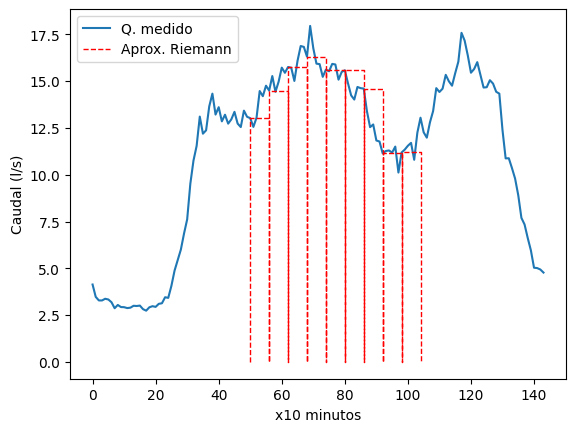

Área es de: 459.74879942321775


In [11]:
plt.plot(caudal['hora'], caudal['caudal'], label='Q. medido')
(A, xbar, ybar)=sum_riemann(xi,xf,caudal,n)
plt.plot(xbar,ybar, linestyle='--', color='r', linewidth=1, label='Aprox. Riemann')
plt.legend()
plt.xlabel('x10 minutos')
plt.ylabel('Caudal (l/s)')
plt.show()

print('Área es de:', A)